In [1]:
import tensorflow as tf
import os
from load_from_file import loading_file, converter
from generator import DataGenerator
from plot_tools import plot_segment_input_voxelbox, plot_segment_reconstructed_voxelbox
from plot_tools import plot_save_segment_input_voxelbox, plot_save_segment_reconstructed_voxelbox
import numpy as np

In [2]:
segments_dict, labels_dict = loading_file('sydney_cars')
segments, ids = converter(segments_dict)

In [3]:
segments=np.array(segments,dtype=np.object)
ids=np.array(ids,dtype=np.object)

cars_ids = [k for k,v in labels_dict.items() if v == 1]
cars_positions = []

for i in cars_ids:
    cars_positions.append(np.where(ids == i)[0][-1])

In [4]:
generator = DataGenerator(nums=np.arange(len(segments)),
                              segments=segments,
                              ids=ids,
                              batch_size=1,
                              dim=(32,32,16),
                              n_classes=len(np.unique(np.array(ids))),
                              shuffle=False)

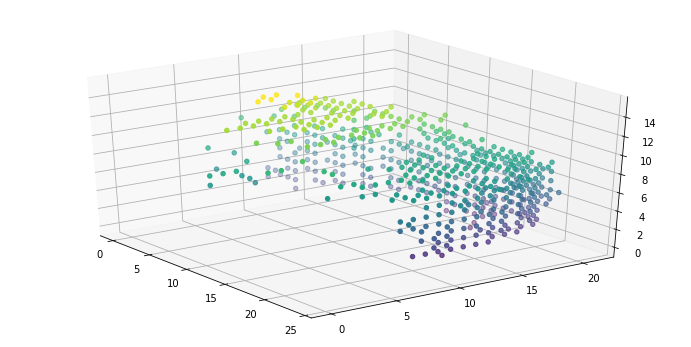

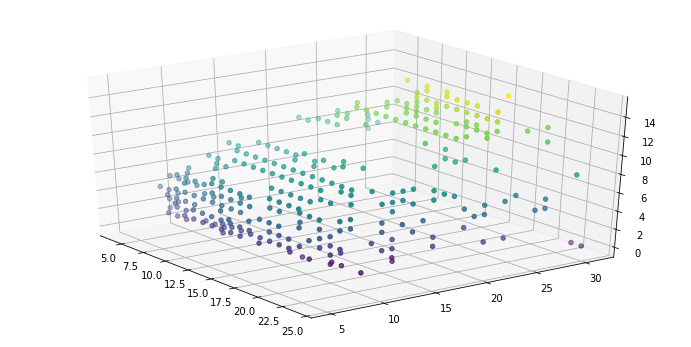

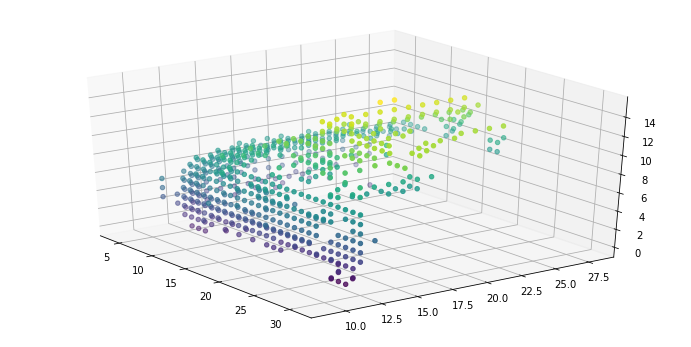

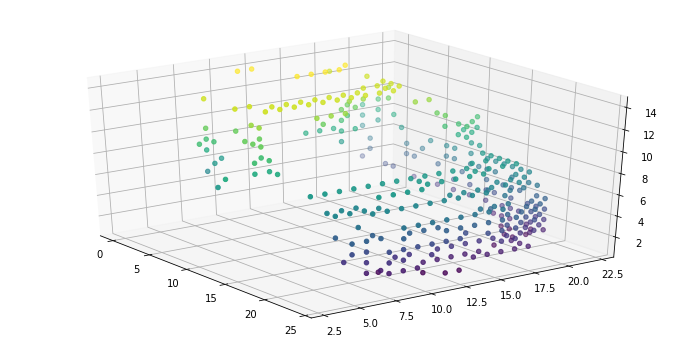

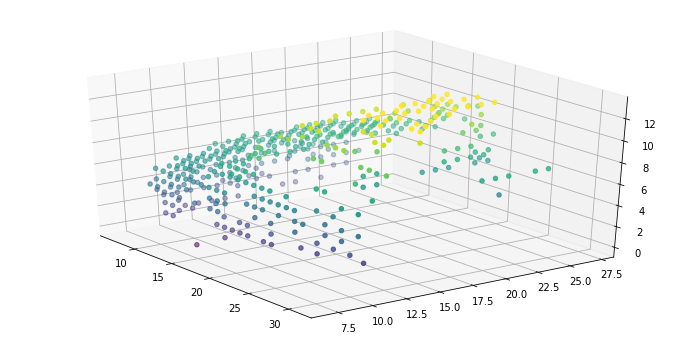

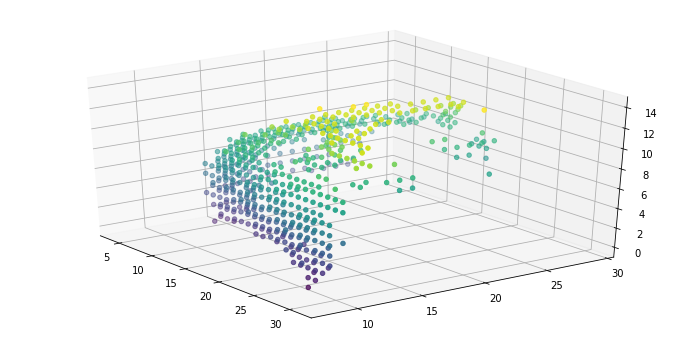

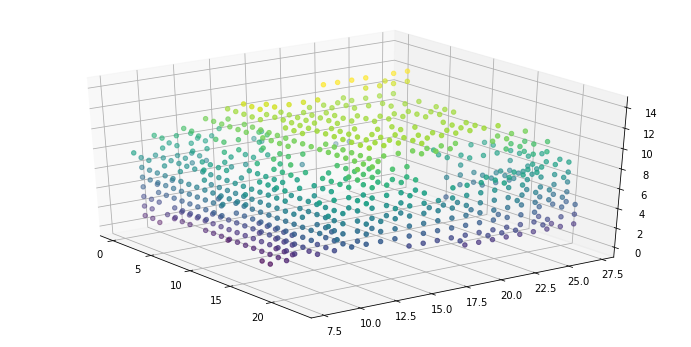

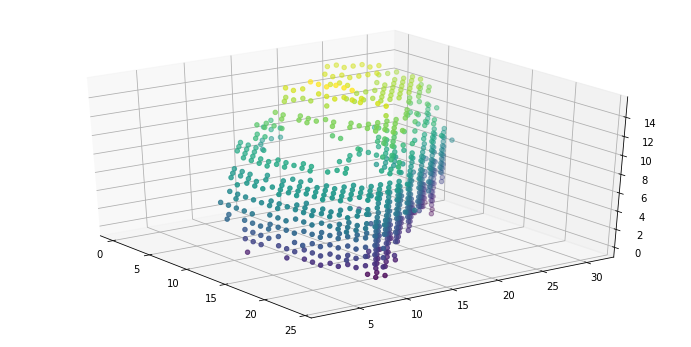

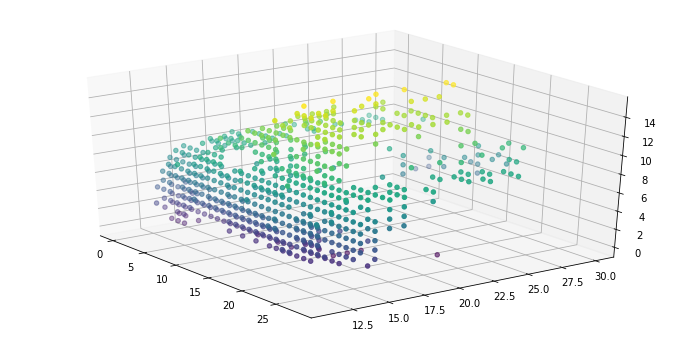

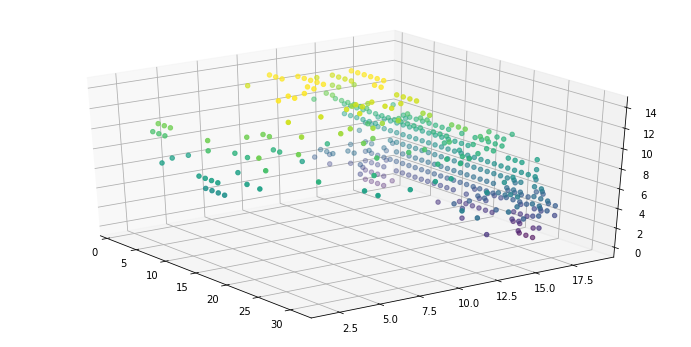

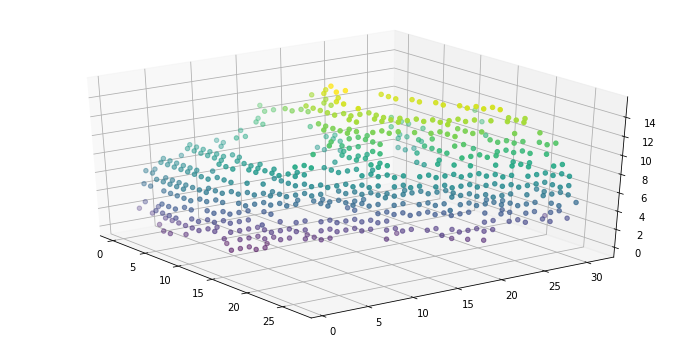

In [5]:
# Choose segment to load
for index, i in enumerate(cars_positions):
    input_segment, _, input_scales = generator.__getitem__(i)
    plot_save_segment_input_voxelbox(input_segment[0], index)

In [13]:
tf.reset_default_graph()

cnn_model_folder = "/Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/"

saver = tf.train.import_meta_graph(
    os.path.join(cnn_model_folder, "model-462315.ckpt.meta")
)

In [14]:
cnn_graph = tf.get_default_graph()

cnn_input = cnn_graph.get_tensor_by_name("InputScope/input:0")
scales = cnn_graph.get_tensor_by_name("scales:0")
cnn_output = cnn_graph.get_tensor_by_name("ReconstructionScopeAE/ae_reconstruction_read:0")

In [15]:
print(cnn_input)
print(scales)
print(cnn_output)

Tensor("InputScope/input:0", shape=(?, 32, 32, 16, 1), dtype=float32)
Tensor("scales:0", shape=(?, 3), dtype=float32)
Tensor("ReconstructionScopeAE/ae_reconstruction_read:0", shape=(?, 32, 32, 16, 1), dtype=float32)


INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


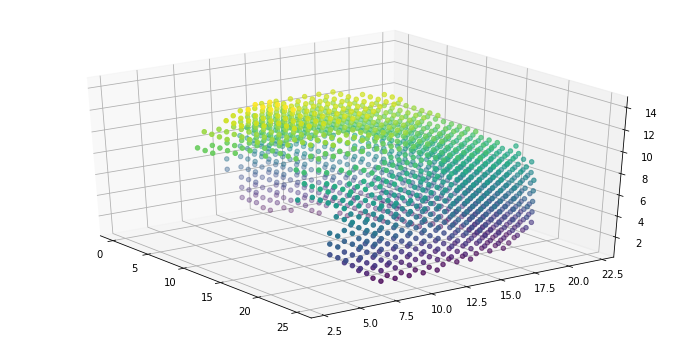

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


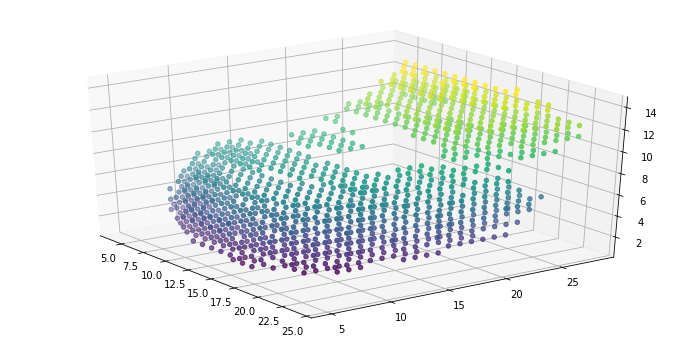

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


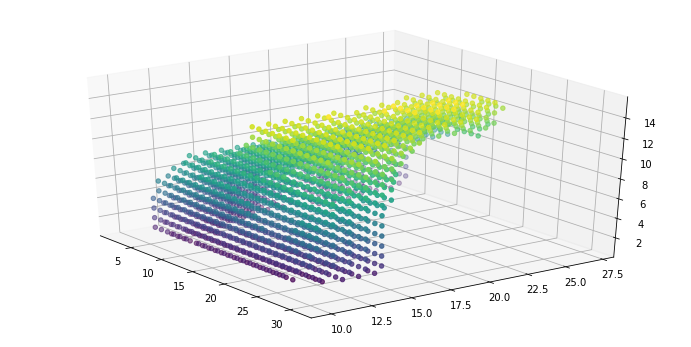

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


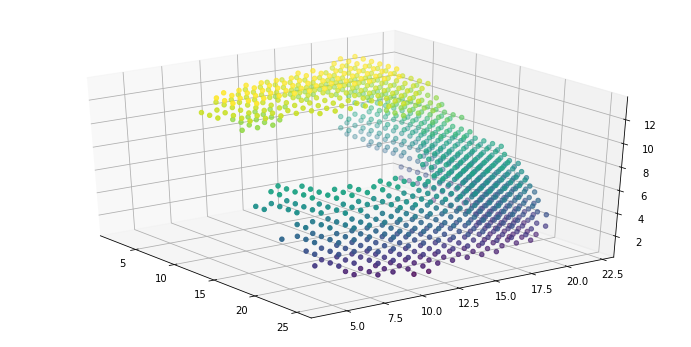

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


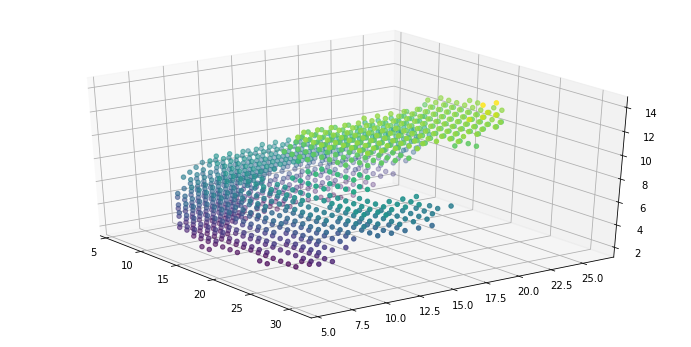

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


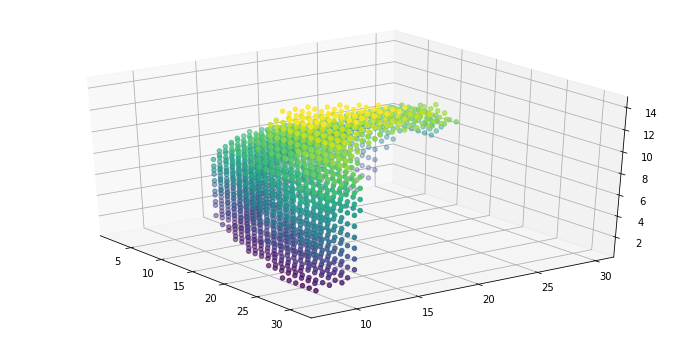

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


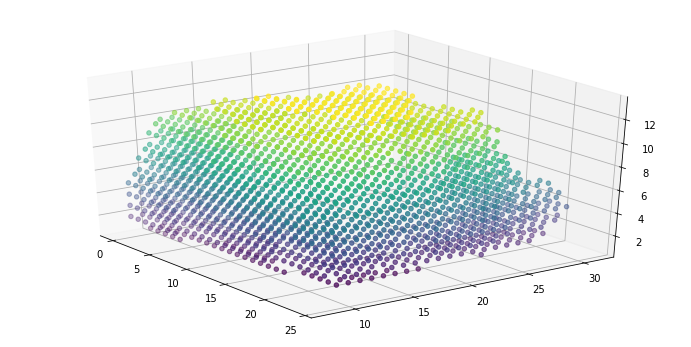

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


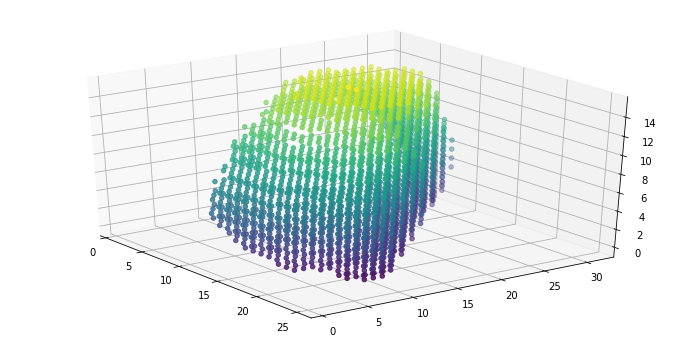

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


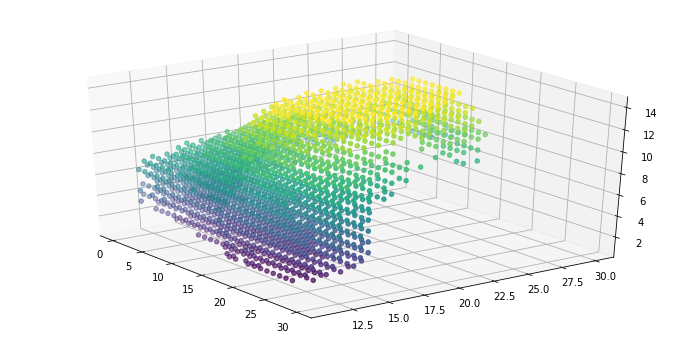

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


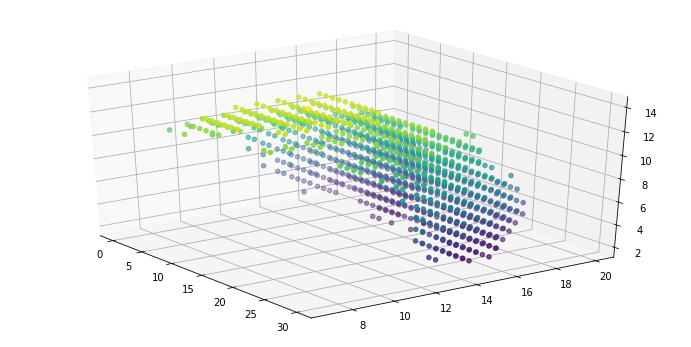

INFO:tensorflow:Restoring parameters from /Users/apple/Downloads/reconstruction/reconstruction loss 255 tf/best model/model-462315.ckpt


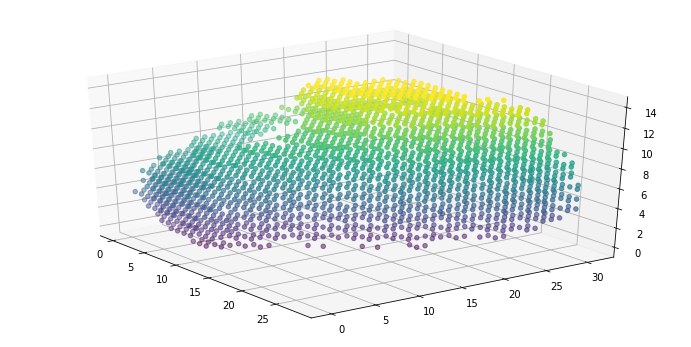

In [16]:
for index, i in enumerate(cars_positions):
    input_segment, _, input_scales = generator.__getitem__(i)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint(cnn_model_folder))
        reconstruction = sess.run(cnn_output,
                                  feed_dict={cnn_input: input_segment.reshape((1, 32, 32, 16, 1)), scales: input_scales})
    plot_save_segment_reconstructed_voxelbox(reconstruction.squeeze(), index)
        